<center><h1>Regressão Linear Simples</h1></center>

Aluno: Nelson de Campos Nolasco.

Disciplina: Deep Learning.

Professor: Rafael Glater





 **Descrição do Problema**



Suponha que você seja o CEO de uma franquia de restaurantes e esteja considerando cidades diferentes para abrir uma nova unidade. A cadeia já possui unidades em várias cidades e você tem dados dos lucros e populações das cidades.

Vamos implementar um modelo de regressão linear simples (ou seja, com uma variável) para prever os lucros de um novo restaurante baseado na população da cidade onde você deseja inaugurar a nova unidade.

# Download dos Dados
Faça o download dos dados clicando <a href="https://drive.google.com/open?id=1uOcKQHAC4sXu8qsBqmKehTk0xN6n5vpL">aqui<a/>.

#Upload dos dados

In [1]:
from google.colab import files
uploaded = files.upload()

Saving ex1data1.txt to ex1data1.txt


# Imports

In [2]:
import numpy as np
import math
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Lendo o arquivo com os dados

In [3]:
data_x = []
data_y = []

with open('ex1data1.txt') as f:
    for line in f:
        parts = line.strip().split(',')
        data_x.append(float(parts[0]))
        data_y.append(float(parts[1]))

# Visualizando os Dados

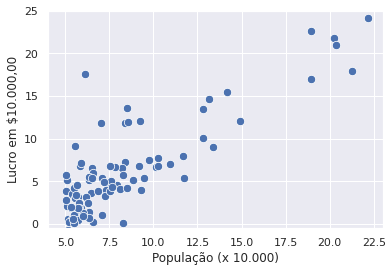

In [4]:
ax = sns.scatterplot(x=data_x, y=data_y, color='b', s=70)
ax.set(xlabel='População (x 10.000)', ylabel='Lucro em $10.000,00')
plt.ylim(-0.5, 25)
plt.xlim(4, 23)
plt.show()

# Inicializando algumas variáveis

In [5]:
# número de exemplos de treino
m = len(data_x)

#adiciona uma colunas de 1's aos dados
data_x1 = np.ones((m, 2))
data_x1[:,1] = data_x

# inicializa os thetas com zero
thetas = np.zeros((2,1))

#Função de Custo
Vamos implementar a função de custo para a regressão linear.
A função vai receber os dados de entrada "x" (lista com as populações) e os dados de saída "y" (lista com os lucros) e os thetas.
Você deve:
- Calcular a hipótese de cada item de x (multiplicando com os thetas)
- Calcular a diferença das hipóteses com os y's e elevar ao quadrado
- Somar todos os quadrados e dividir por 2*m

Abaixo estão as fórmulas da hipótese h(x) e do custo J para te auxiliar

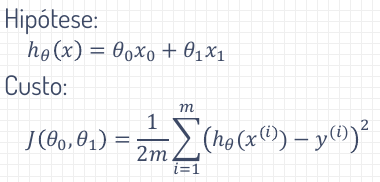

**Complete o código abaixo**

É possível calcular o custo com apenas 2 linhas de código através da multiplicação de vetores. Mas aconselho você a fazer primeiro com um *for*, percorrendo os *m* exemplos e fazendo os cálculos. 

In [6]:
'''
data_x: Lista com valores de entrada (a primeira coluna tem valor 1, a segunda é o valor da população)
        [[1, 6.1101],
         [1, 5.5277],
         [1, 8.5186],
         ...        ]
data_y: Lista com os valores de saída (lucros)
        [17.592, 9.1302, 13.662, ...]

thetas: Lista com os thetas da hipótese (na posição zero está o theta0 e na posição um está theta1)
        [0.0, 0.0]
'''
def cost_function(data_x, data_y, thetas):
    m = float(len(data_x))
    cost = 0

    # ----- SEU CÓDIGO AQUI -------
    sum_difs = 0
    for i in range(int(m)):
        h = thetas[0] * data_x[i] [0] + thetas[1] * data_x[i][1]
        dif = math.pow (h - data_y[i],2)
        sum_difs += dif
    cost = sum_difs / (2*m)

    # -----------------------------

    return cost

###Testando a função de custo

In [7]:
# o valor esperado é ~32.07
print(cost_function(data_x1, data_y, thetas))

# o valor esperado é ~54.24
print(cost_function(data_x1, data_y, np.array([-1,2])))

32.072733877455654
54.24245508201238


# Gradiente Descendente
O gradiente descendente atualiza os valores de theta através da derivada parcial da função de custo. Na função abaixo vamos escrever o código que irá calcular e retornar os novos valores de theta.
Abaixo a fórmula que calcula o novo valor para os thetas:

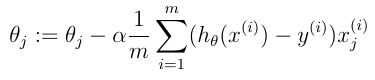

In [8]:
def update_thetas(data_x, data_y, thetas, alpha):
    new_theta0 = 0
    new_theta1 = 0

    # -------- SEU CÓDIGO AQUI -----------------------
    sum_difs0 = 0
    sum_difs1 = 0
    for i in range(int (m)):
      h = thetas[0] * data_x[i][0] + thetas[1] * data_x[i][1]
      sum_difs0 += (h - data_y[i]) * data_x[i][0]
      sum_difs1 += (h - data_y[i]) * data_x[i][1]
    mean0 = sum_difs0 / float(m)
    mean1 = sum_difs1 / float(m)
    new_theta0 = thetas[0] - alpha * mean0
    new_theta1 = thetas[1] - alpha * mean1
    # ------------------------------------------------
    
    return np.array([new_theta0, new_theta1])


### Rodando o GD

Vamos rodar o gradiente descendente por 1500 iterações. Comçamos inicializando os thetas com zero e a cada iteração chamamos a função acima para atualizar seus valores. Vamos guardar também todo o histórico de thetas e custos para plotarmos mais adiante.

In [9]:
thetas = np.zeros((2,1))
thetas_history = [thetas]
cost_history = []
for i in range(1500):
    thetas = update_thetas(data_x1, data_y, thetas, 0.01)
    thetas_history.append(thetas)

    cost_history.append(cost_function(data_x1, data_y, thetas))

# os valores são [[-3.63, 1.16]]
print('Valores finais dos thetas:')
print(thetas)

Valores finais dos thetas:
[[-3.63029144]
 [ 1.16636235]]


### Plotando as hipóteses ao longo das iterações do GD

Como armazenamos todo o histórico de thetas ao longo dos passos do gradiente descendente, vamos plotá-los para visualizar o aprendizado do modelo:

In [10]:
fig = plt.figure()
ax = sns.scatterplot(x=data_x, y=data_y, color='r', s=70)
ax.set(xlabel='População (x 10.000)', ylabel='Lucro em $10.000,00')
line, = ax.plot([], [], color='b')
plt.ylim(-0.5, 25)
plt.xlim(4, 23)
plt.setp(ax.lines,linewidth=3)
plt.close()

def init():
    global thetas
    thetas = np.zeros((2,1))

    line.set_data([], [])
    return line,

def animate(i):
    global thetas_history, data_x1, data_y

    x_plot = np.linspace(0, 25, 2)
    y_plot = thetas_history[i][0] + thetas_history[i][1]*x_plot

    line.set_data(x_plot, y_plot)

    return line,


frames_to_show = np.concatenate((np.arange(0, 1500, 10),[1499]))    
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=frames_to_show, interval=20, blit=True)

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')
anim


# Plotando o custo ao longo das iterações do GD

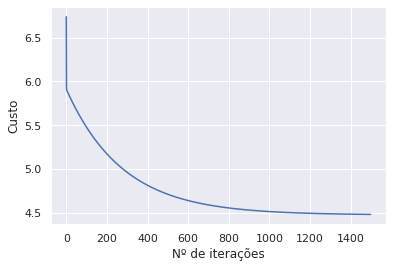

In [11]:
ax = sns.lineplot(x=range(1500), y=cost_history, color='b')
ax.set(xlabel='Nº de iterações', ylabel='Custo')
plt.show()